In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
mall_cust=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
mall_cust.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall_cust.shape

(200, 5)

In [8]:
mall_cust=mall_cust.rename(columns={"Genre":"gender","Annual Income (k$)":"income","Spending Score (1-100)":"score"})

In [9]:
mall_cust=mall_cust.drop("CustomerID", axis=1)
mall_cust.head()

,gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
mall_cust.describe()

,Age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
mall_cust.isnull().sum()

gender    0
Age       0
income    0
score     0
dtype: int64

In [12]:
mall_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   income  200 non-null    int64 
 3   score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


**Data Visualisation**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mall_cust.gender=le.fit_transform(mall_cust.gender)
mall_cust.head()

,gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [15]:
df=mall_cust.copy()

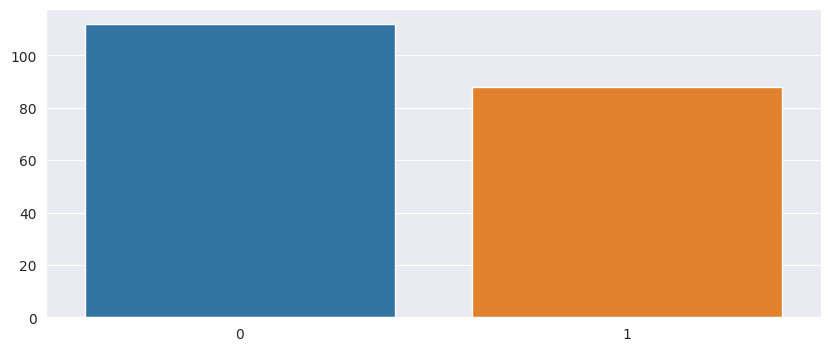

In [17]:
genders = mall_cust.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

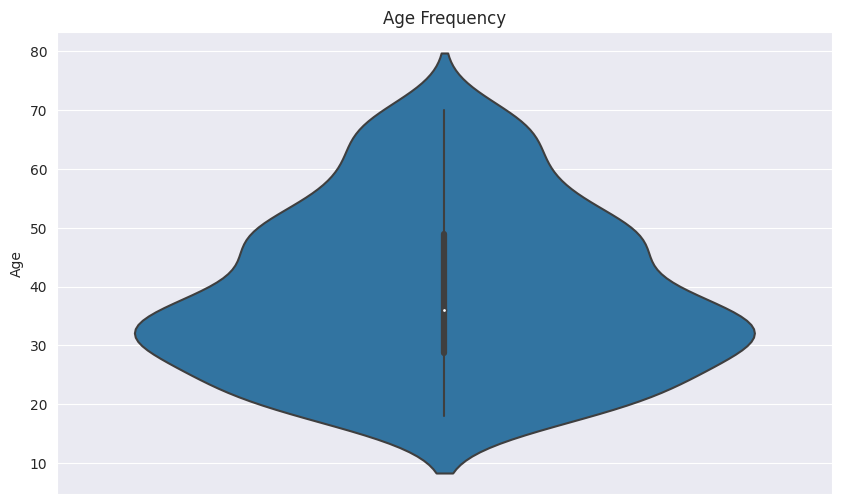

In [19]:
plt.figure(figsize=(10,6))
plt.title("Age Frequency")
sns.axes_style('dark')
sns.violinplot(y=df["Age"])
plt.show()

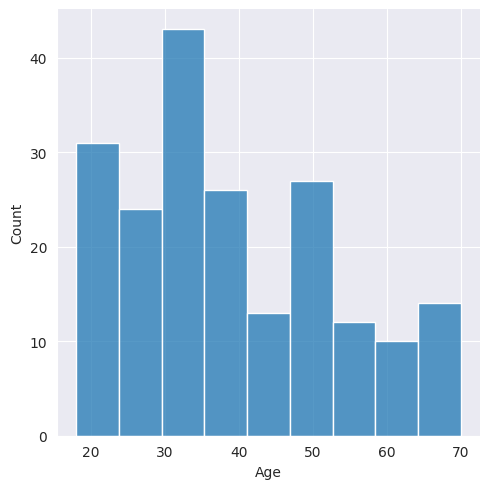

In [20]:
sns.displot(df['Age'])

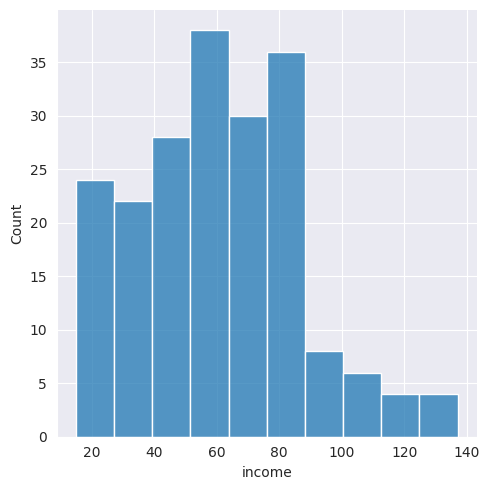

In [21]:
sns.displot(df['income'])

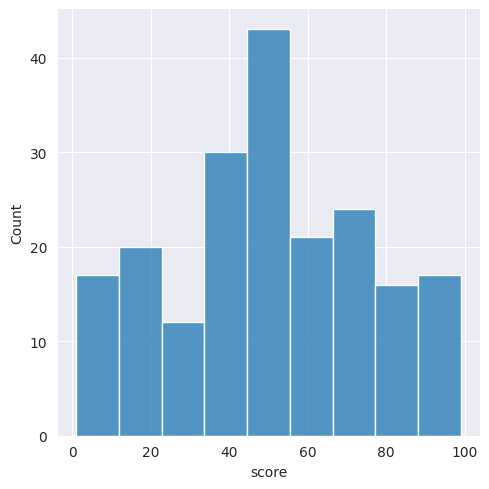

In [22]:
sns.displot(df['score'])

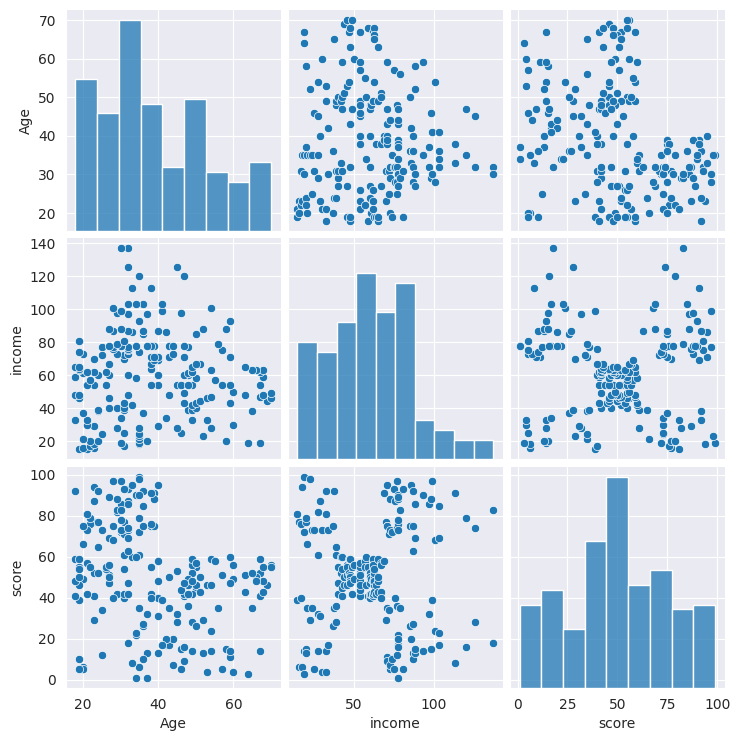

In [23]:
sns.pairplot(mall_cust[['Age','income','score']])

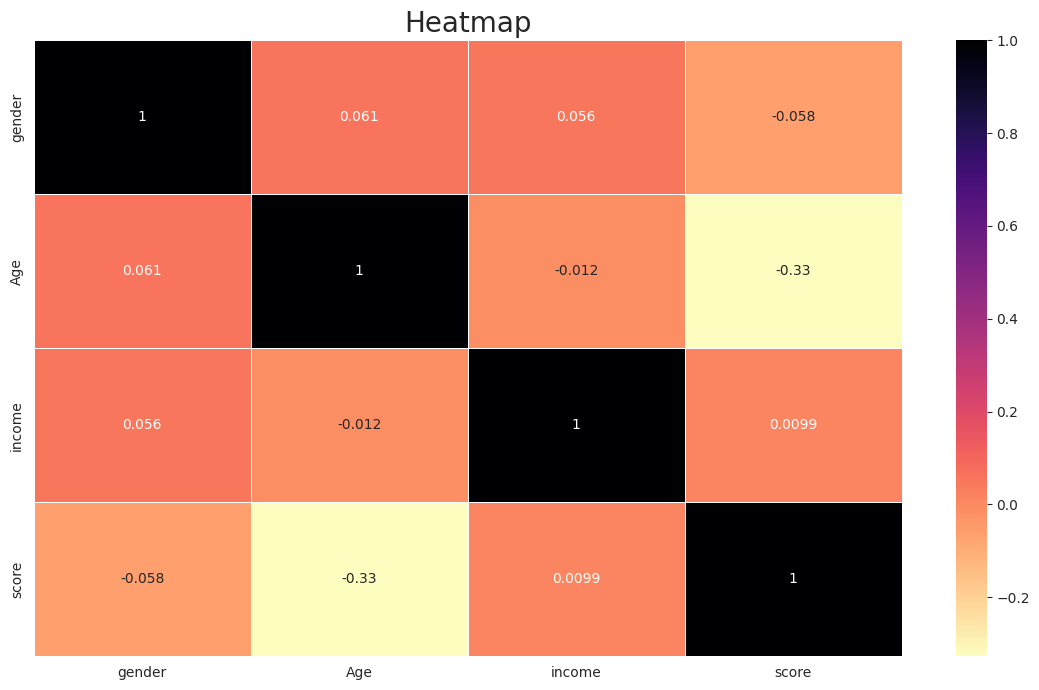

In [44]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.heatmap(mall_cust[[ 'gender', 'Age', 'income','score']].corr(), cmap = 'magma_r', annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

**Gender vs Spending Score**

Text(31.749999999999993, 0.5, 'score')

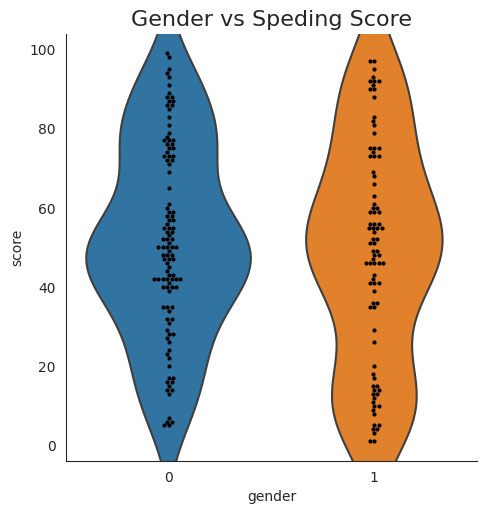

In [72]:
plt.rcParams['figure.figsize']=(16,7)
g=sns.catplot(x='gender',y='score', kind='violin', inner=None,data=mall_cust)
sns.swarmplot(x='gender',y='score', color='k', size=3, data=mall_cust, ax=g.ax)
plt.title('Gender vs Speding Score', fontsize=16)
plt.xlabel('gender')
plt.ylabel('score')

**Gender vs Annual Income**

Text(29.000000000000007, 0.5, 'income')

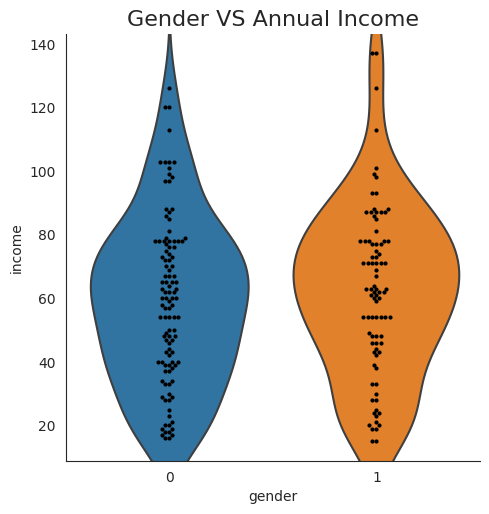

In [73]:
plt.rcParams['figure.figsize']=(16,7)
g=sns.catplot(x='gender',y='income',kind='violin', inner=None, data=mall_cust)
sns.swarmplot(x='gender',y='income', color='k', size=3,data=mall_cust,ax=g.ax)
plt.title('Gender VS Annual Income', fontsize=16)
plt.xlabel('gender')
plt.ylabel('income')

**Gender vs Age**

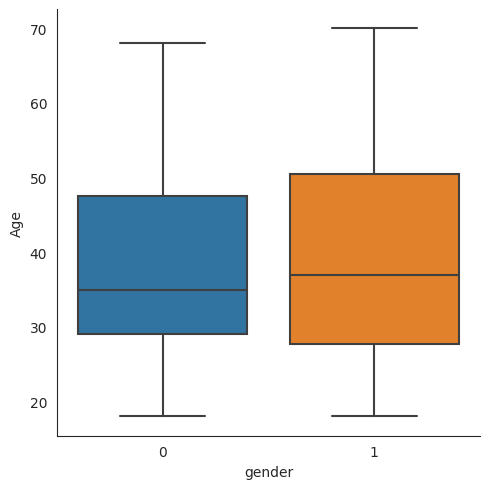

In [74]:
sns.catplot(x='gender',y='Age', kind='box', data=df)

**K-Means Clustering**

In [75]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans()
predicted = kmeans.fit_predict(mall_cust[['income','score']])
predicted

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 0, 5, 0, 7, 0, 7, 0,
       5, 0, 7, 0, 7, 0, 7, 0, 7, 0, 5, 0, 7, 0, 5, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 0, 7, 0, 5, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0,
       7, 0, 7, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6,
       2, 6], dtype=int32)

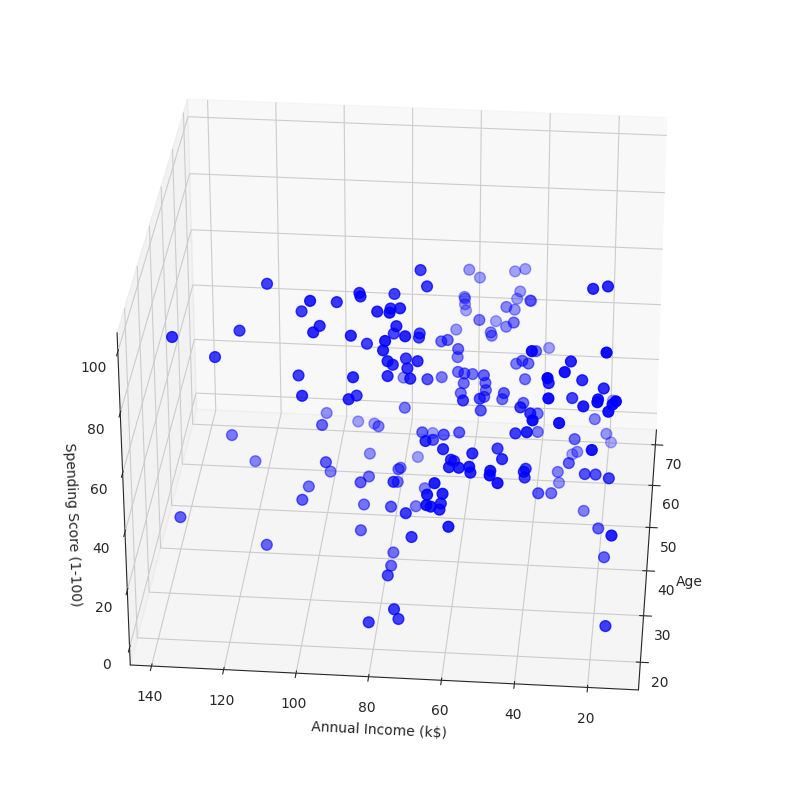

In [76]:
from mpl_toolkits.mplot3d import Axes3D

sns.set_style("white")
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(mall_cust.Age, mall_cust['income'],mall_cust['score'],c='blue',s=60)
ax.view_init(30,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

**Elbow method to find the optimal number of Clusters**

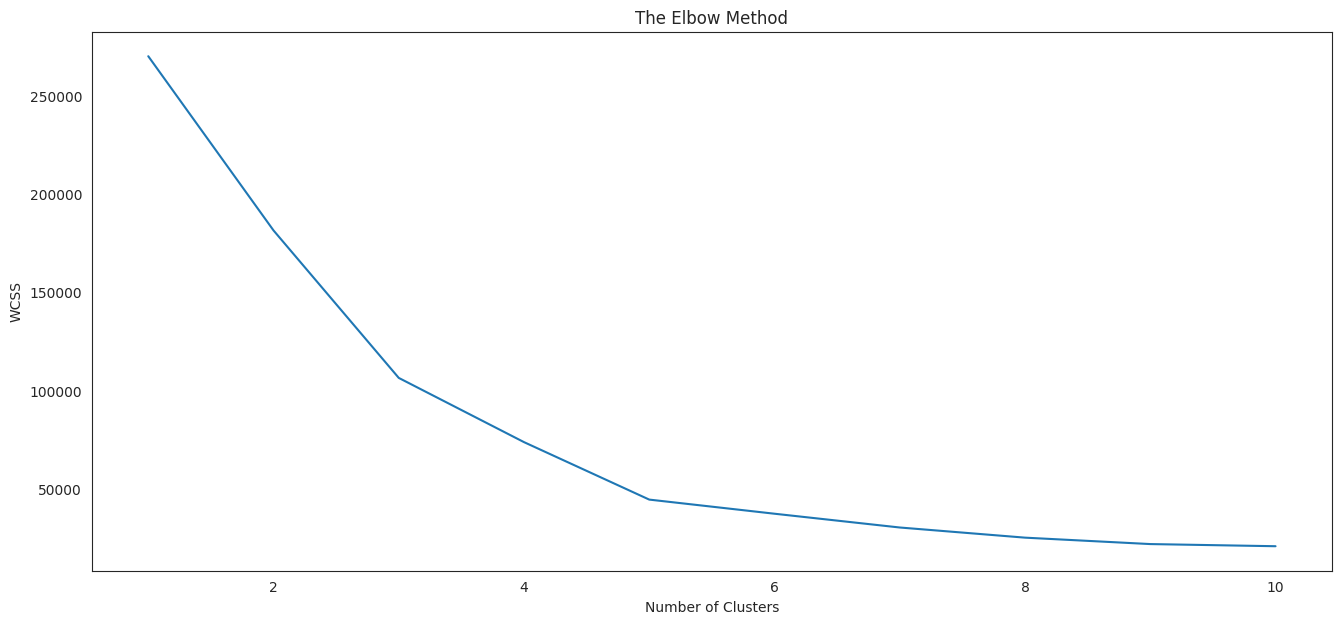

In [77]:
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(mall_cust[['score', 'income']])
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

In [79]:
kmeans =KMeans(n_clusters=5, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(mall_cust[['income','score']])

In [80]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [81]:
mall_cust['predicted']=y_kmeans
mall_cust.head()

,gender,Age,income,score,predicted
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [82]:
centers = kmeans.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [83]:
mall_cust.head()

,gender,Age,income,score,predicted
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [84]:
df.head()

,gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [85]:
data=df.iloc[:,[2,3]].values

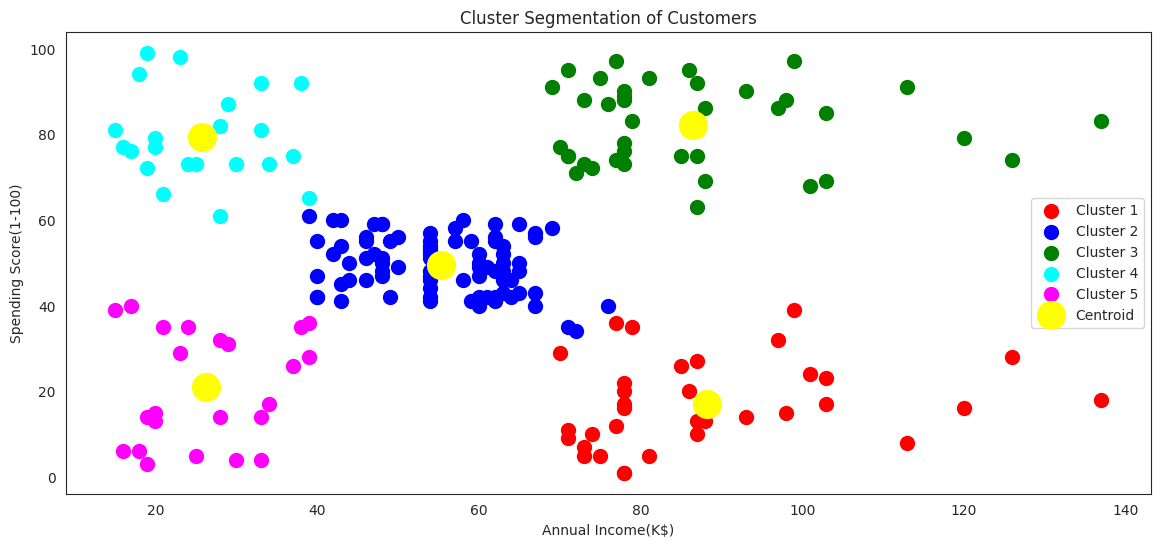

In [86]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

**k-means clustering based on Age**

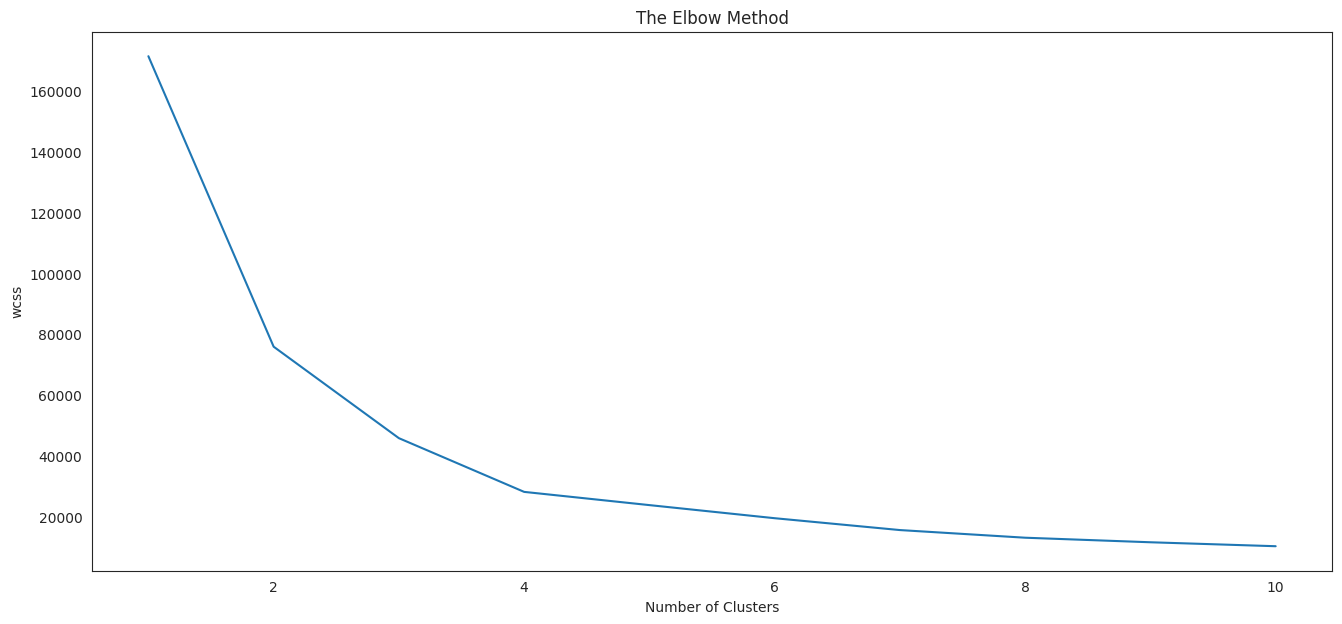

In [87]:

data=mall_cust.iloc[:,[1,3]].values
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans. inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

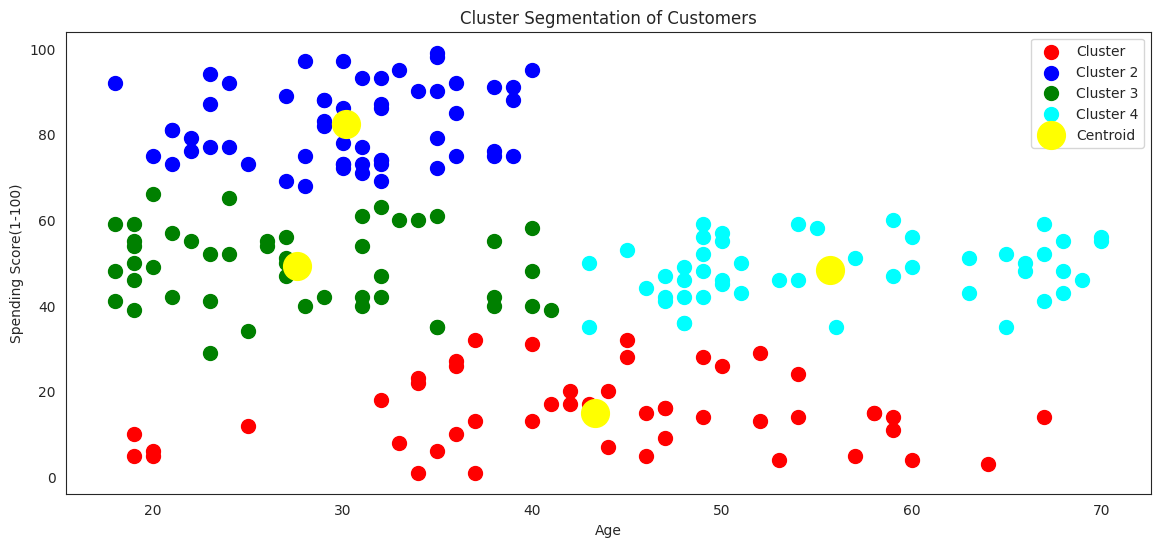

In [88]:
kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the clusters

fig,ax=plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0], data[y_kmeans==0,1], s=100, c='red', label='Cluster')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()